## Plots of MOM6 ISOMIP 

Trying to plot density profile resultant

In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
base_folder = '/scratch/x77/cy8964/mom6/archive/'
list_folders = ['layer','zstar','zstar_surfPedit']#,'sigmazstar-noshelf','sigma-noshelf']
no_configs = len(list_folders)

In [3]:
## define some useful functions

## open files from NCI storage
def open_files(i):
    base = base_folder + list_folders[i]
    prog = xr.open_dataset(base + '/output000/prog__0001_001.nc')
    ocean_static = xr.open_dataset(base + "/output000/ocean_geometry.nc")
    return prog, ocean_static

## plot a transect of variable with given y section (yy0) and time (tt)
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap):
    prog, ocean_static = open_files(i)
    file_name = list_folders[i]
    label = list_folders[i]
    depth = prog.e
    lon = ocean_static.geolon
    dataplot = variable

    xx = lon
    if varname == "uo": dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:-1,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) #Dummy, just for have z_levels
    # plot variable in colours
    xi, yyi = np.meshgrid(xx[yy0,:], yi) #We repeat the horizontal part of the grid by the number of zlevels
    cax = ax.contourf(xi,yy[tt,...],dataplot[tt,:,yy0,:],levels = levels, cmap = cmap, extend = 'both')
    plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-720,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    
# find horizontal speed
def find_speed(prog):
    # interpolate speeds to the same grid
    uo_interp = grid.interp(prog.u,'x',boundary='extend')
    vo_interp = grid.interp(prog.v,'y',boundary='extend')
    horiz_speed = np.sqrt(uo_interp**2+vo_interp**2)
    return horiz_speed


In [14]:
RHO_T0_S0 = 999.9106806711001
DRHO_DT = -0.0383569483 
DRHO_DS = 0.805876093 ## These are the same as ISOMIP Asay-Davis 2016 protocol

def find_density(prog):
    temp = prog.temp#.isel(Time = time)
    salt = prog.salt#.isel(Time = time)
    rho = RHO_T0_S0 + DRHO_DT*temp + DRHO_DS*salt
    return rho

def find_density_IC(IC):
    temp = IC.Temp#.isel(Time = time)
    salt = IC.Salt#.isel(Time = time)
    rho = RHO_T0_S0 + DRHO_DT*temp + DRHO_DS*salt
    return rho



# Plot transect zoom

In [18]:
j = 1
initial_conditions = xr.open_dataset(base_folder + list_folders[j]+'/output000/ISOMIP_IC.nc')

time = 0001-01-01 02:00:00


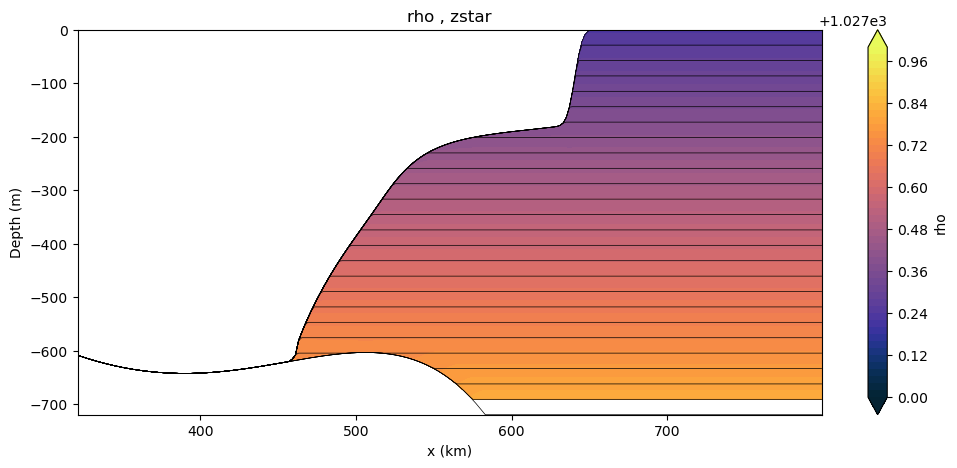

In [25]:
fig,axes = plt.subplots(figsize = (12,5))
time = 0
x = 25
j = 1 #experminet
prog, ocean_static = open_files(j)
#plot temp
rho = find_density(prog)
plot(axes,x,time,j,rho,"rho",1027,1028,cm.cm.thermal)

print('time = '+str(prog.isel(Time = time).Time.values))

time = 0001-01-01 02:00:00


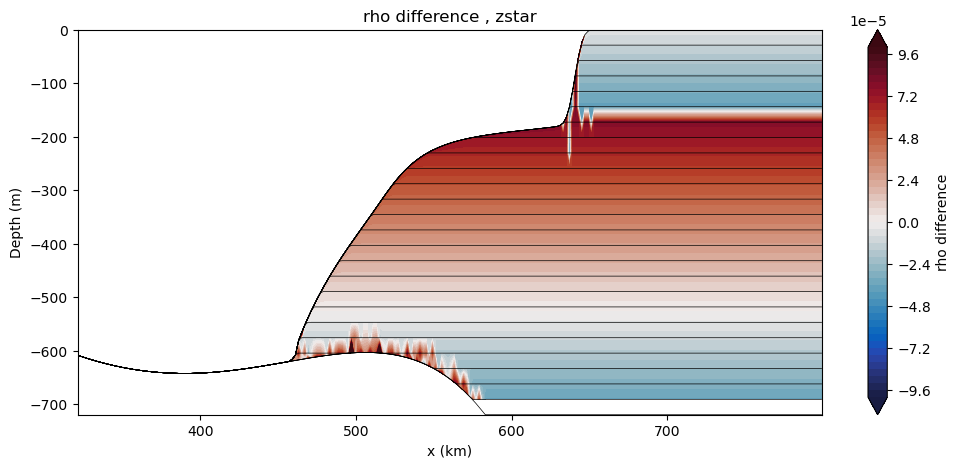

In [23]:
fig,axes = plt.subplots(figsize = (12,5))
time = 0
x = 25
j = 1 #experminet
prog, ocean_static = open_files(j)
#plot temp
rho_i = find_density_IC(initial_conditions).rename({'lonh':'xh','lath':'yh'}).values
rho_f = find_density(prog)
plot(axes,x,time,j,rho_f-rho_i,"rho difference",-0.0001,0.0001,cm.cm.balance)

print('time = '+str(prog.isel(Time = time).Time.values))

time = 0001-01-02 02:00:00


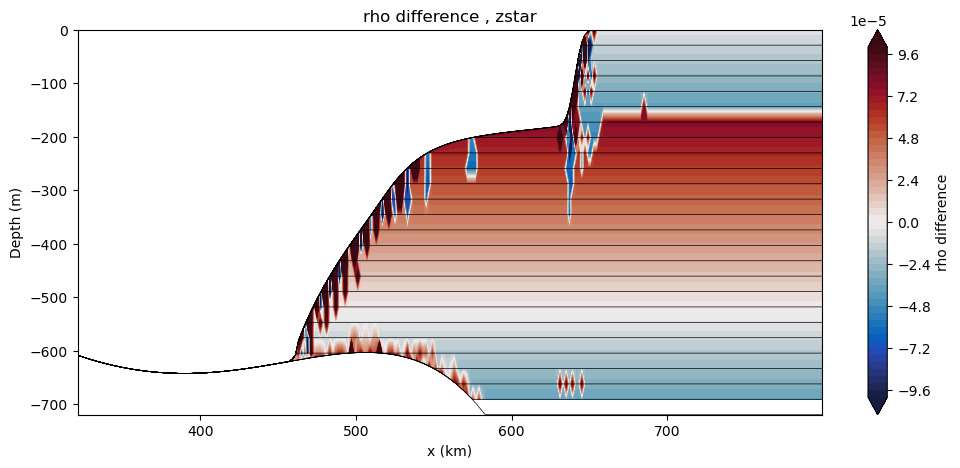

In [24]:
fig,axes = plt.subplots(figsize = (12,5))
time = 12
x = 25
j = 1 #experminet
prog, ocean_static = open_files(j)
#plot temp
rho_i = find_density_IC(initial_conditions).rename({'lonh':'xh','lath':'yh'}).values
rho_f = find_density(prog)
plot(axes,x,time,j,rho_f-rho_i,"rho difference",-0.0001,0.0001,cm.cm.balance)

print('time = '+str(prog.isel(Time = time).Time.values))

Salinity in IC's not uniform but maybe due to depth of middle of layer for vanishing layers

